In [1]:
import pandas as pd
import seaborn as sns
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_raw.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


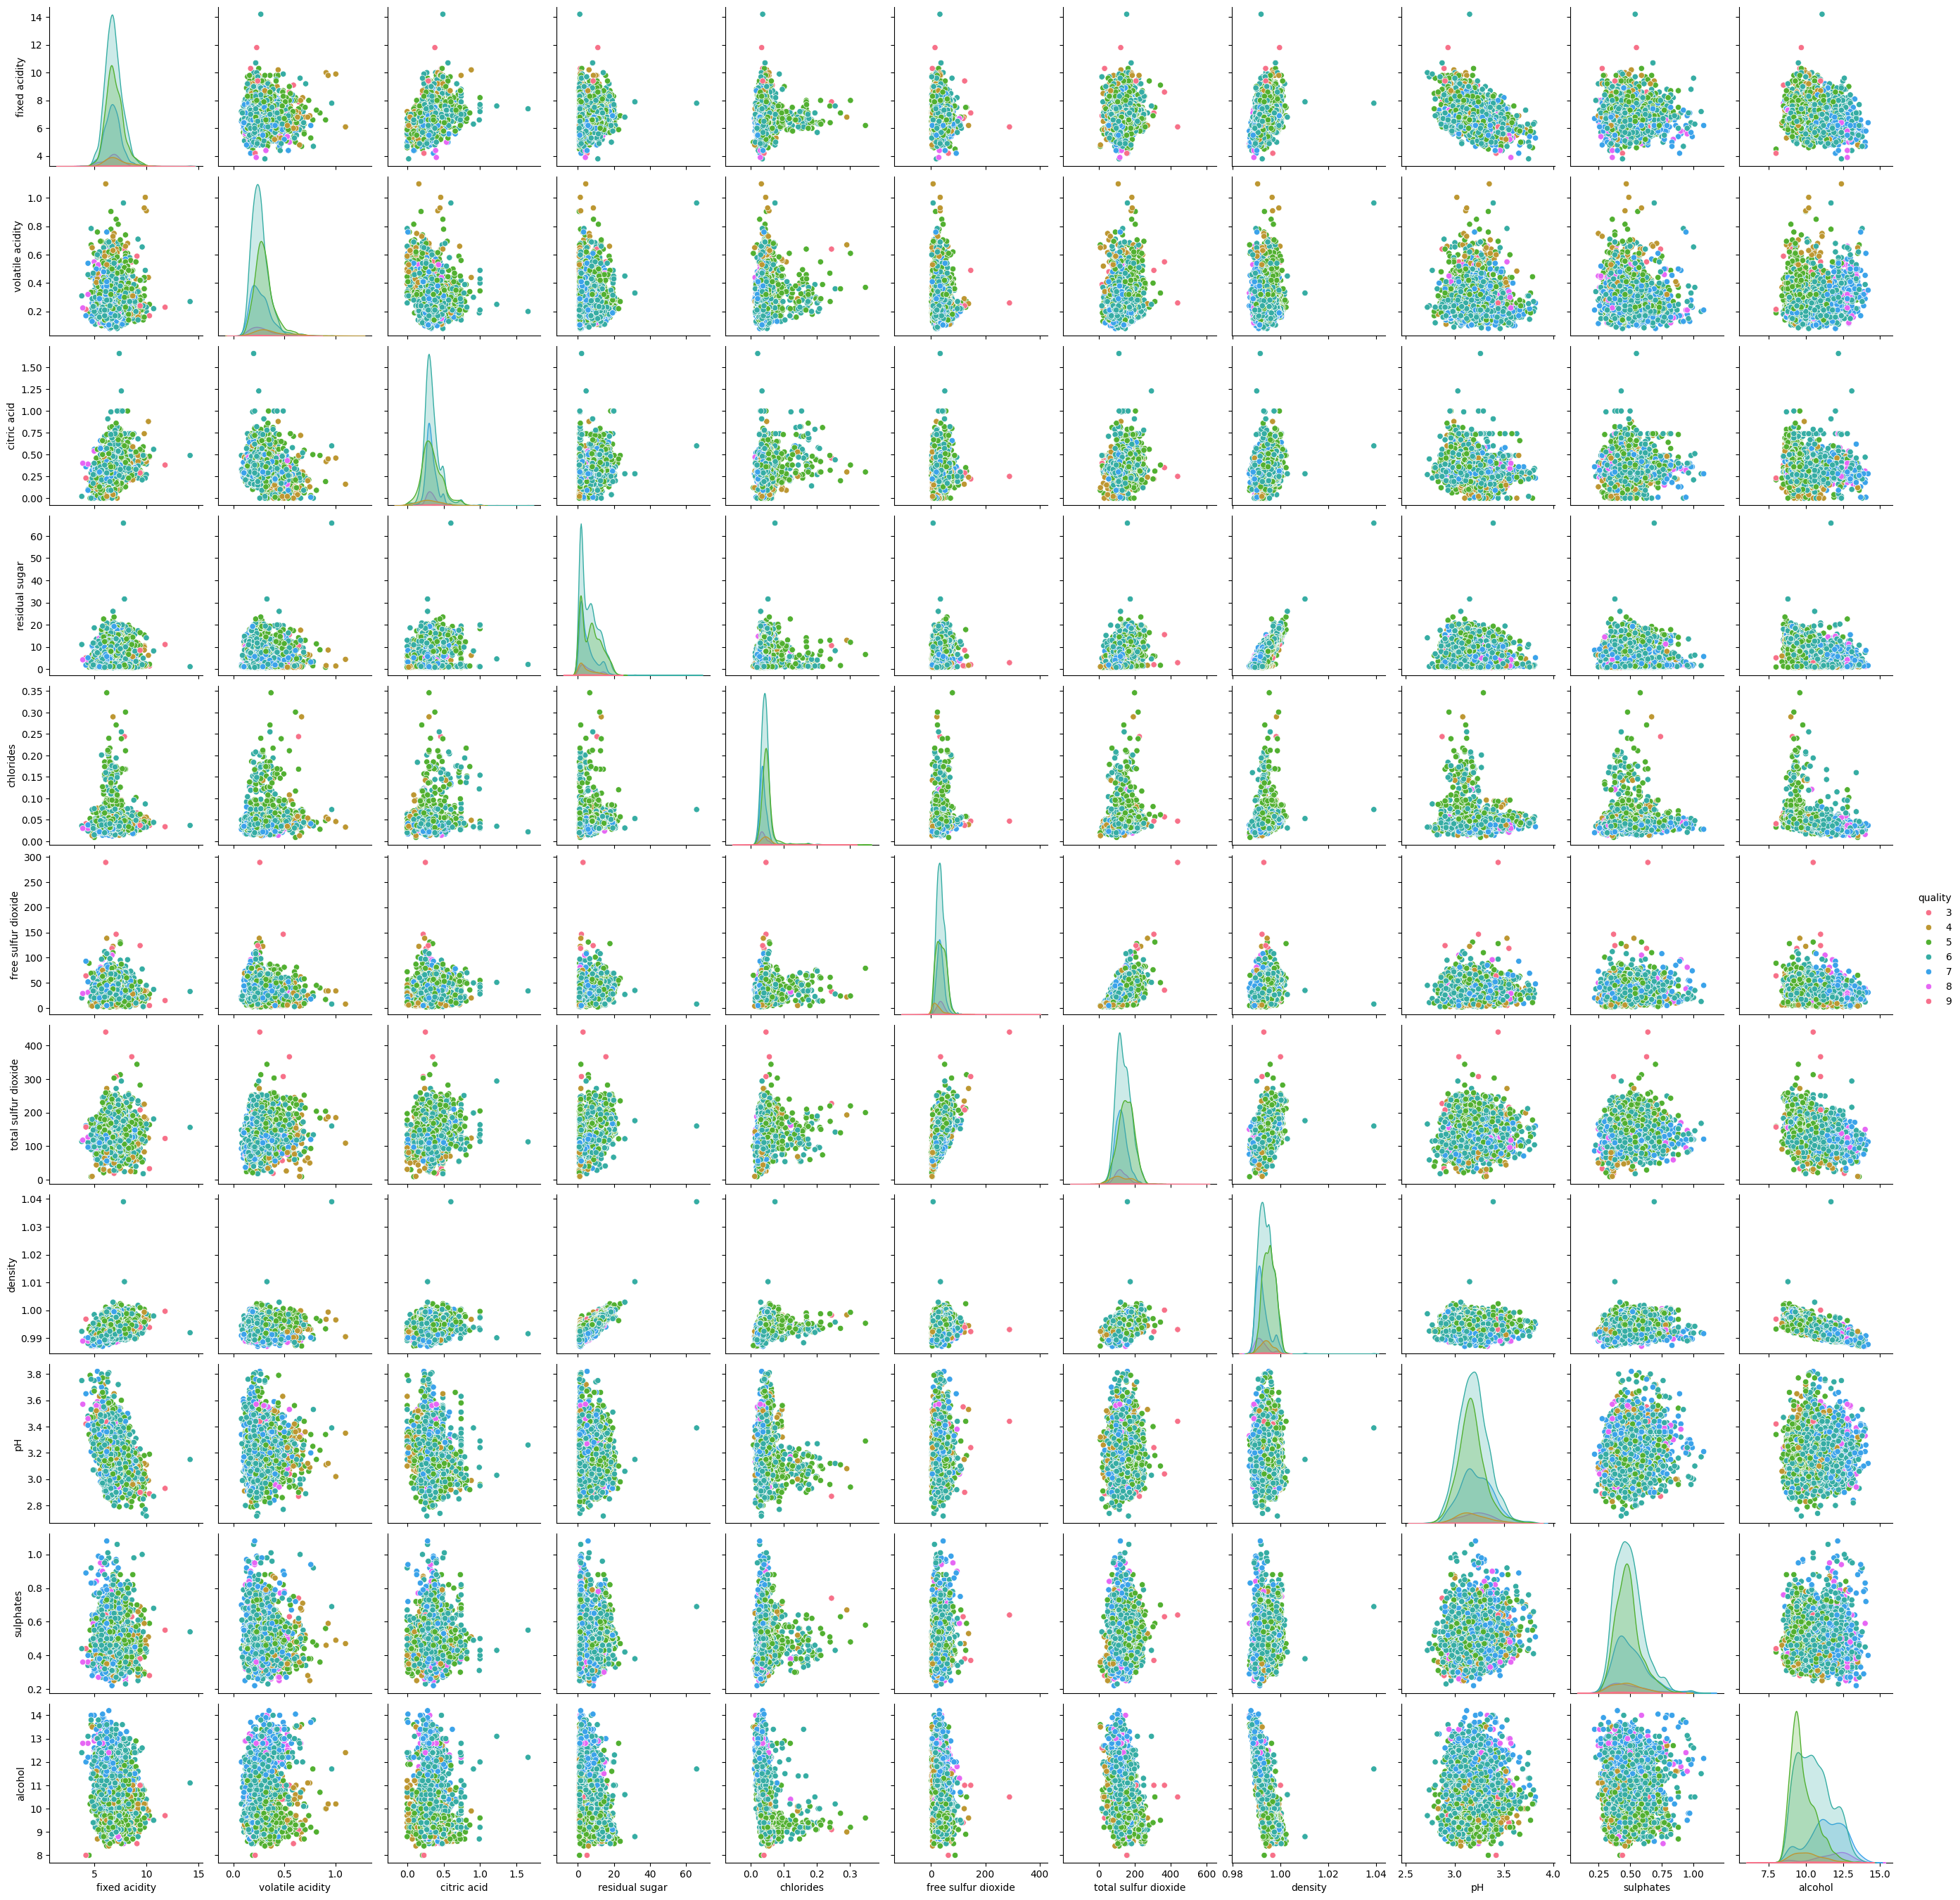

In [5]:
sns.pairplot(df_raw, hue="quality", palette="husl")

In [6]:
X = df_raw.drop(columns=['quality'])
X.columns = X.columns.str.strip().str.replace(' ', '_')

y = df_raw['quality']

In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'{X_train.shape=}')
print(f'{X_val.shape=}')
print(f'{X_test.shape=}')

X_train.shape=(3918, 11)
X_val.shape=(490, 11)
X_test.shape=(490, 11)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [9]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
4665,0.515119,-1.076233,0.227731,0.340419,-0.813688,0.534065,-0.641932,-0.447041,-0.328261,-0.702445,1.540371
1943,-0.669188,-0.288777,0.895832,1.002071,-0.217212,0.773947,1.355106,0.903370,-0.061886,0.266074,-0.821712
3399,-1.498203,0.400248,-0.022807,0.184737,-0.400743,-0.605377,-1.022320,-0.460280,0.404271,0.001933,0.481506
843,0.041396,-0.879369,0.144218,-0.924503,-0.446626,-0.125612,-0.879675,-0.304718,0.137896,0.442168,0.237153
2580,0.988842,0.203384,-0.607396,2.432407,0.333383,0.054300,0.855846,1.883079,0.071302,0.089980,-0.088652


In [11]:
def create_dataloader(X, y, batch_size=32, shuffle=False):
    """
    Create DataLoader from X and y DataFrame.
    """
    X_tensor = torch.FloatTensor(X.values)
    y_tensor = torch.FloatTensor(y.values)
    dataset = TensorDataset(X_tensor, y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return dataloader

In [12]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 32

train_datalaoder = create_dataloader(X_train, y_train, batch_size=batch_size, shuffle=True)
val_datalaoder = create_dataloader(X_val, y_val, batch_size=batch_size, shuffle=False)
test_datalaoder = create_dataloader(X_test, y_test, batch_size=batch_size, shuffle=False)